In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data1 = pd.read_csv('data1.csv').add_prefix('1_')
data2 = pd.read_csv('data2.csv').drop(['beta'], axis=1).add_prefix('2_')
data3 = pd.read_csv('data3.csv').drop(['beta'], axis=1).add_prefix('3_')
data7 = pd.read_csv('data7.csv').drop(['beta'], axis=1).add_prefix('7_')
data = pd.concat([data1, data2, data3, data7], axis=1)
data = data.truncate(after=21)
# data.loc[len(data)] = 0
data

,1_Unnamed: 0,1_beta,1_em_recall,1_em_precision,1_em_f1,1_dr_recall,1_dr_precision,1_dr_f1,2_Unnamed: 0,2_em_recall,...,3_dr_recall,3_dr_precision,3_dr_f1,7_Unnamed: 0,7_em_recall,7_em_precision,7_em_f1,7_dr_recall,7_dr_precision,7_dr_f1
0,0,0.05,0.800000,0.510204,0.623053,0.200000,0.188679,0.194175,0,0.750000,...,0.200000,0.200000,0.200000,0,0.17,0.548387,0.259542,0.107511,0.275714,0.154699
1,1,0.10,0.820000,0.543478,0.653699,0.245402,0.278453,0.260885,1,0.800000,...,0.276190,0.276190,0.276190,1,0.33,0.568966,0.417722,0.155714,0.304444,0.206043
2,2,0.15,0.904833,0.625000,0.739323,0.457490,0.424812,0.440546,2,0.875000,...,0.311927,0.472233,0.375694,2,0.64,0.680851,0.659794,0.257347,0.347313,0.295637
3,3,0.20,0.932849,0.689655,0.793026,0.600000,0.548173,0.572917,3,0.904762,...,0.364179,0.552233,0.438911,3,0.76,0.716981,0.737864,0.322051,0.383534,0.350114
4,4,0.25,0.966184,0.787402,0.867679,0.671469,0.589812,0.627997,4,0.910714,...,0.435213,0.581633,0.497881,4,0.93,0.809917,0.865815,0.388605,0.450164,0.417125
5,5,0.30,0.980392,0.900901,0.938967,0.721519,0.676960,0.698529,5,0.946190,...,0.534403,0.661026,0.591008,5,0.95,0.871560,0.909091,0.453534,0.535916,0.491295
6,6,0.35,0.980392,0.940901,0.960241,0.835227,0.740554,0.785047,6,0.954545,...,0.675809,0.727182,0.700555,6,1.00,0.934579,0.966184,0.542549,0.622772,0.579899
7,7,0.40,0.990099,0.965222,0.977502,0.895371,0.814917,0.853252,7,0.955909,...,0.730000,0.810976,0.768360,7,1.00,0.961538,0.980392,0.689388,0.688462,0.688924
8,8,0.45,0.985222,0.970874,0.977995,0.960000,0.878049,0.917197,8,0.966522,...,0.800513,0.864865,0.831446,8,1.00,0.980392,0.990099,0.759487,0.858757,0.806077
9,9,0.50,0.990099,0.980174,0.985111,0.980396,0.900929,0.938984,9,0.979592,...,0.873993,0.903571,0.888536,9,1.00,0.980392,0.990099,0.837260,0.922535,0.877832


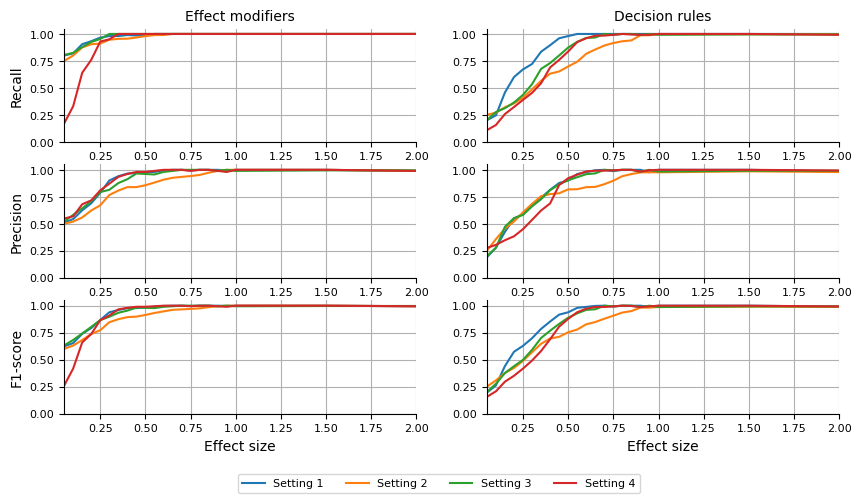

In [13]:
fig, ax = plt.subplots(nrows=3, ncols = 2, figsize=(10,5))
ax[0, 0].set_title('Effect modifiers', fontsize = 10)
ax[0, 1].set_title('Decision rules', fontsize = 10)

sns.lineplot(x='1_beta', y = 'value', data=pd.melt(data, id_vars=['1_beta'], value_vars=['1_em_recall', '2_em_recall', '3_em_recall', '7_em_recall']), hue='variable', ax=ax[0, 0])
ax[0, 0].set(ylabel = 'Recall')
ax[0, 0].get_legend().remove()
ax[0, 0].set_xlim((0.05,2.0))
ax[0, 0].set_ylim((0,1.05))
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].tick_params(axis='both', which='major', labelsize=8)
ax[0, 0].grid(True)

sns.lineplot(x='1_beta', y = 'value', data=pd.melt(data, id_vars=['1_beta'], value_vars=['1_em_precision', '2_em_precision', '3_em_precision', '7_em_precision']), hue='variable', ax=ax[1, 0])
ax[1, 0].set(ylabel = 'Precision')
ax[1, 0].get_legend().remove()
ax[1, 0].set_xlim((0.05,2.0))
ax[1, 0].set_ylim((0,1.05))
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].tick_params(axis='both', which='major', labelsize=8)
ax[1, 0].grid(True)

sns.lineplot(x='1_beta', y = 'value', data=pd.melt(data, id_vars=['1_beta'], value_vars=['1_em_f1', '2_em_f1', '3_em_f1', '7_em_f1']), hue='variable', ax=ax[2, 0])
ax[2, 0].set(ylabel = 'F1-score')
ax[2, 0].get_legend().remove()
ax[2, 0].set_xlim((0.05,2.0))
ax[2, 0].set_ylim((0,1.05))
ax[2, 0].spines['top'].set_visible(False)
ax[2, 0].spines['right'].set_visible(False)
ax[2, 0].tick_params(axis='both', which='major', labelsize=8)
ax[2, 0].grid(True)

sns.lineplot(x='1_beta', y = 'value', data=pd.melt(data, id_vars=['1_beta'], value_vars=['1_dr_recall', '2_dr_recall', '3_dr_recall', '7_dr_recall']), hue='variable', ax=ax[0, 1])
ax[0, 1].set(ylabel = None)
ax[0, 1].get_legend().remove()
ax[0, 1].set_xlim((0.05,2.0))
ax[0, 1].set_ylim((0,1.05))
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].tick_params(axis='both', which='major', labelsize=8)
ax[0, 1].grid(True)

sns.lineplot(x='1_beta', y = 'value', data=pd.melt(data, id_vars=['1_beta'], value_vars=['1_dr_precision', '2_dr_precision', '3_dr_precision', '7_dr_precision']), hue='variable', ax=ax[1, 1])
ax[1, 1].set(ylabel = None)
ax[1, 1].get_legend().remove()
ax[1, 1].set_xlim((0.05,2.0))
ax[1, 1].set_ylim((0,1.05))
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].tick_params(axis='both', which='major', labelsize=8)
ax[1, 1].grid(True)

sns.lineplot(x='1_beta', y = 'value', data=pd.melt(data, id_vars=['1_beta'], value_vars=['1_dr_f1', '2_dr_f1', '3_dr_f1', '7_dr_f1']), hue='variable', ax=ax[2, 1])
ax[2, 1].set(ylabel = None)
ax[2, 1].get_legend().remove()
ax[2, 1].set_xlim((0.05,2.0))
ax[2, 1].set_ylim((0,1.05))
ax[2, 1].spines['top'].set_visible(False)
ax[2, 1].spines['right'].set_visible(False)
ax[2, 1].tick_params(axis='both', which='major', labelsize=8)
ax[2, 1].grid(True)

ax[2, 1].set(xlabel = 'Effect size')
ax[2, 0].set(xlabel = 'Effect size')

handles, labels = ax[0, 0].get_legend_handles_labels()
# order = [3, 0, 1, 2, 4]
# handles = [handles[i] for i in order]
# # 5, 1, 2, 3, 7
labels = ["Setting 1", "Setting 2", "Setting 3", "Setting 4"]
fig.legend(handles, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 0), fontsize=8);

In [4]:
data_em = pd.read_csv('all_settings_lambda_em.csv')
data_dr = pd.read_csv('all_settings_lambda_dr.csv')
data_em.head()

,matrix.nrow...21.,lambdas,r 1,p 1,f 1,r 2,p 2,f 2,r 3,p 3,f 3,r 5,p 5,f 5,r 6,p 6,f 6,r 7,p 7,f 7
0,NaN,0,1,0.516796,0.681431,1.0,0.515464,0.680272,1,0.515464,0.680272,NaN,0.0,NaN,1,0.500000,0.666667,1,0.510204,0.675676
1,NaN,1,1,0.581395,0.735294,1.0,0.564972,0.722022,1,0.564972,0.722022,NaN,0.0,NaN,1,0.520833,0.684932,1,0.595238,0.746269
2,NaN,2,1,0.673401,0.804829,1.0,0.641026,0.781250,1,0.641026,0.781250,NaN,0.0,NaN,1,0.630915,0.773694,1,0.677966,0.808081
3,NaN,3,1,0.746269,0.854701,1.0,0.735294,0.847458,1,0.716846,0.835073,NaN,0.0,NaN,1,0.701754,0.824742,1,0.746269,0.854701
4,NaN,4,1,0.829876,0.907029,1.0,0.800000,0.888889,1,0.772201,0.871460,NaN,0.0,NaN,1,0.729927,0.843882,1,0.800000,0.888889


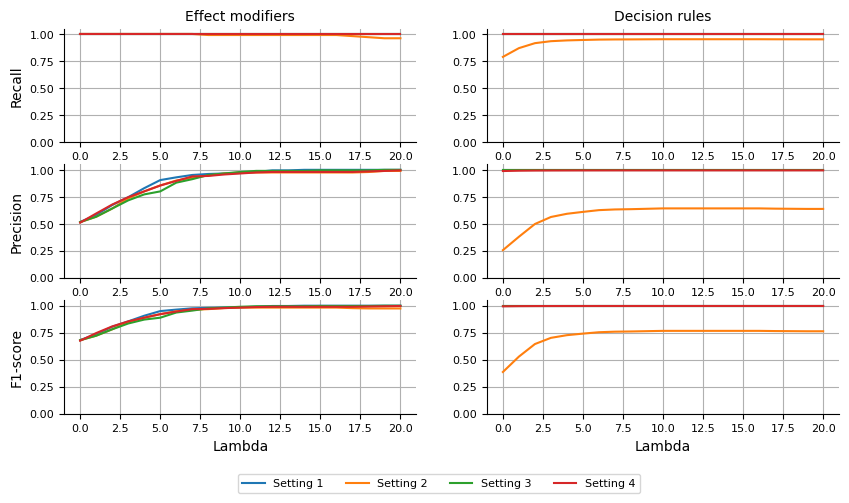

In [5]:
fig, ax = plt.subplots(nrows=3, ncols = 2, figsize=(10,5))
ax[0, 0].set_title('Effect modifiers', fontsize = 10)
ax[0, 1].set_title('Decision rules', fontsize = 10)

sns.lineplot(x='lambdas', y = 'value', data=pd.melt(data_em, id_vars=['lambdas'], value_vars=['r 1', 'r 2', 'r 3', 'r 7']), hue='variable', ax=ax[0, 0])
ax[0, 0].set(ylabel = 'Recall')
ax[0, 0].set_ylim((0,1.05))
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].tick_params(axis='both', which='major', labelsize=8)
ax[0, 0].get_legend().remove()
ax[0, 0].grid(True)

sns.lineplot(x='lambdas', y = 'value', data=pd.melt(data_em, id_vars=['lambdas'], value_vars=['p 1', 'p 2', 'p 3', 'p 7']), hue='variable', ax=ax[1, 0])
ax[1, 0].set(ylabel = 'Precision')
ax[1, 0].set_ylim((0,1.05))
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].tick_params(axis='both', which='major', labelsize=8)
ax[1, 0].get_legend().remove()
ax[1, 0].grid(True)

sns.lineplot(x='lambdas', y = 'value', data=pd.melt(data_em, id_vars=['lambdas'], value_vars=['f 1', 'f 2', 'f 3', 'f 7']), hue='variable', ax=ax[2, 0])
ax[2, 0].set(ylabel = 'F1-score')
ax[2, 0].set_ylim((0,1.05))
ax[2, 0].spines['top'].set_visible(False)
ax[2, 0].spines['right'].set_visible(False)
ax[2, 0].tick_params(axis='both', which='major', labelsize=8)
ax[2, 0].get_legend().remove()
ax[2, 0].grid(True)

sns.lineplot(x='lambdas', y = 'value', data=pd.melt(data_dr, id_vars=['lambdas'], value_vars=['r 1', 'r 2', 'r 3','r 7']), hue='variable', ax=ax[0, 1])
ax[0, 1].set(ylabel = None)
ax[0, 1].set_ylim((0,1.05))
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].tick_params(axis='both', which='major', labelsize=8)
ax[0, 1].get_legend().remove()
ax[0, 1].grid(True)

sns.lineplot(x='lambdas', y = 'value', data=pd.melt(data_dr, id_vars=['lambdas'], value_vars=['p 1', 'p 2', 'p 3','p 7']), hue='variable', ax=ax[1, 1])
ax[1, 1].set(ylabel = None)
ax[1, 1].set_ylim((0,1.05))
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].tick_params(axis='both', which='major', labelsize=8)
ax[1, 1].get_legend().remove()
ax[1, 1].grid(True)

sns.lineplot(x='lambdas', y = 'value', data=pd.melt(data_dr, id_vars=['lambdas'], value_vars=['f 1', 'f 2', 'f 3', 'f 7']), hue='variable', ax=ax[2, 1])
ax[2, 1].set(ylabel = None)
ax[2, 1].set_ylim((0,1.05))
ax[2, 1].spines['top'].set_visible(False)
ax[2, 1].spines['right'].set_visible(False)
ax[2, 1].tick_params(axis='both', which='major', labelsize=8)
ax[2, 1].get_legend().remove()
ax[2, 1].grid(True)

ax[2, 1].set(xlabel = 'Lambda')
ax[2, 0].set(xlabel = 'Lambda')

handles, labels = ax[0, 0].get_legend_handles_labels()
# order = [0, 1, 2, 4]
# handles = [handles[i] for i in order]
# 5, 1, 2, 3, 7
labels = ["Setting 1", "Setting 2", "Setting 3", "Setting 4"]
fig.legend(handles, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 0), fontsize=8);

In [6]:
data = pd.read_csv('lambda_metrics.csv')
new_data = pd.DataFrame()
new_data['lambda'] = [i for i in range(0, 21)]
for i in [1, 2, 3, 5, 7]:
    new_data['b' + str(i)] = data[data['setting'] == i]['bias'].tolist()
    new_data['m' + str(i)] = data[data['setting'] == i]['mse'].tolist()
    new_data['v' + str(i)] = data[data['setting'] == i]['variance'].tolist()
    new_data['s' + str(i)] = data[data['setting'] == i]['selected.tree.size'].tolist()
new_data.head()

,lambda,b1,m1,v1,s1,b2,m2,v2,s2,b3,...,v3,s3,b5,m5,v5,s5,b7,m7,v7,s7
0,0,-0.402865,14.501087,12.520067,7.37,-0.325233,13.652491,12.185525,6.03,-0.310284,...,12.877035,7.03,-0.467624,2.937621,1.167795,0.68,0.052615,15.821307,14.424696,7.60
1,1,-0.401391,21.506411,19.521671,5.77,-0.327781,14.328156,12.858484,5.07,-0.312325,...,15.504089,5.90,-0.467082,2.384154,0.609772,0.39,0.055186,25.494253,24.084294,5.68
2,2,-0.398704,23.883352,21.891126,4.70,-0.328134,12.552127,11.086995,3.94,-0.311685,...,16.905670,4.90,-0.468891,2.079211,0.304042,0.21,0.052751,25.330921,23.923111,4.64
3,3,-0.398841,24.102025,22.116321,4.07,-0.329076,11.377269,9.914670,3.21,-0.313135,...,16.662973,4.31,-0.467792,1.830657,0.058846,0.11,0.053977,24.594929,23.184155,4.04
4,4,-0.398583,23.291729,21.305028,3.61,-0.328775,10.331839,8.871738,2.84,-0.311747,...,17.078675,3.97,-0.468269,1.812686,0.040119,0.06,0.056494,24.179503,22.772950,3.71


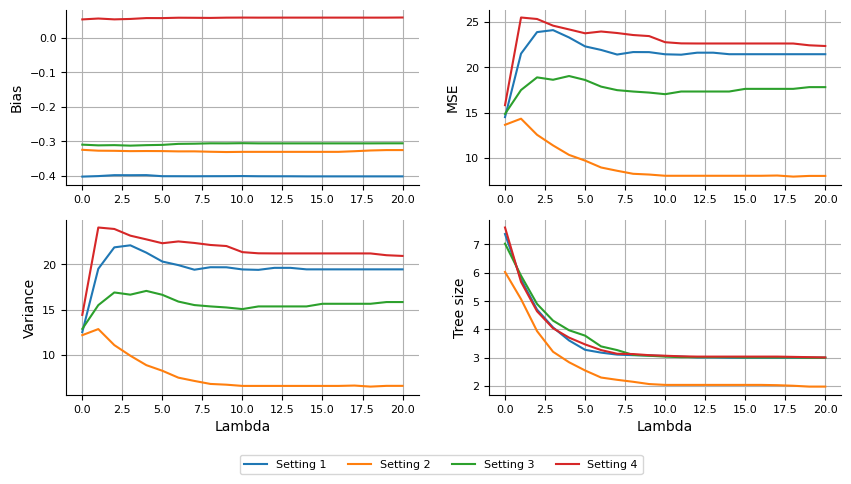

In [7]:
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize=(10, 5))

sns.lineplot(x='lambda', y = 'value', data=pd.melt(new_data, id_vars=['lambda'], value_vars=['b1', 'b2', 'b3', 'b7']), hue='variable', ax=ax[0, 0])
ax[0, 0].set(ylabel = 'Bias')
ax[0, 0].set(xlabel = None)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].tick_params(axis='both', which='major', labelsize=8)
ax[0, 0].get_legend().remove()
ax[0, 0].grid(True)

sns.lineplot(x='lambda', y = 'value', data=pd.melt(new_data, id_vars=['lambda'], value_vars=['v1', 'v2', 'v3','v7']), hue='variable', ax=ax[1, 0])
ax[1, 0].set(ylabel = 'Variance')
ax[1, 0].set(xlabel = None)
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].tick_params(axis='both', which='major', labelsize=8)
ax[1, 0].get_legend().remove()
ax[1, 0].grid(True)

sns.lineplot(x='lambda', y = 'value', data=pd.melt(new_data, id_vars=['lambda'], value_vars=['m1', 'm2', 'm3', 'm7']), hue='variable', ax=ax[0, 1])
ax[0, 1].set(ylabel = 'MSE')
ax[0, 1].set(xlabel = None)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].tick_params(axis='both', which='major', labelsize=8)
ax[0, 1].get_legend().remove()
ax[0, 1].grid(True)

sns.lineplot(x='lambda', y = 'value', data=pd.melt(new_data, id_vars=['lambda'], value_vars=['s1', 's2', 's3', 's7']), hue='variable', ax=ax[1, 1])
ax[1, 1].set(ylabel = 'Tree size')
ax[1, 1].set(xlabel = None)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].tick_params(axis='both', which='major', labelsize=8)
ax[1, 1].get_legend().remove()
ax[1, 1].grid(True)

ax[1, 1].set(xlabel = 'Lambda')
ax[1, 0].set(xlabel = 'Lambda')

handles, labels = ax[0, 0].get_legend_handles_labels()
# order = [3, 0, 1, 2, 4]
# handles = [handles[i] for i in order]
# 1, 2, 3, 7
labels = ["Setting 1", "Setting 2", "Setting 3", "Setting 4"]
fig.legend(handles, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 0), fontsize=8);